In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "drive/MyDrive/Customer Segmentation in US"

/content/drive/MyDrive/Customer Segmentation in US


# 2_Data_preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.wrangle import wrangle
from scipy.stats.mstats import trimmed_var


in this notebook i modified wrangle function and make it returns a DataFrame of households whose net worth is less than $2 million and that have been turned down for credit or feared being denied credit in the past 5 years (see "TURNFEAR").

In [ ]:
#Data Wrangling
df=wrangle("data/SCFP2019.csv")

print(f"the shape of the data is : {df.shape}")
df.head()

the shape of the data is : (4418, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Feature selection

as we want to make a clustring model so the best features here is the features with th hieghest variance

In [ ]:
#get the top ten features with the hieghest variance
feat =df.var().sort_values().tail(10)
#plotting these features
fig =px.bar(
    data_frame=feat,
    x=feat.values,
    y=feat.index,
    orientation="h",
    title="Top ten features with the hieghest variance",
)
fig.show()

but there is something may lead to wrong feature selection ,and this thing is the outliers so lets check it on these features

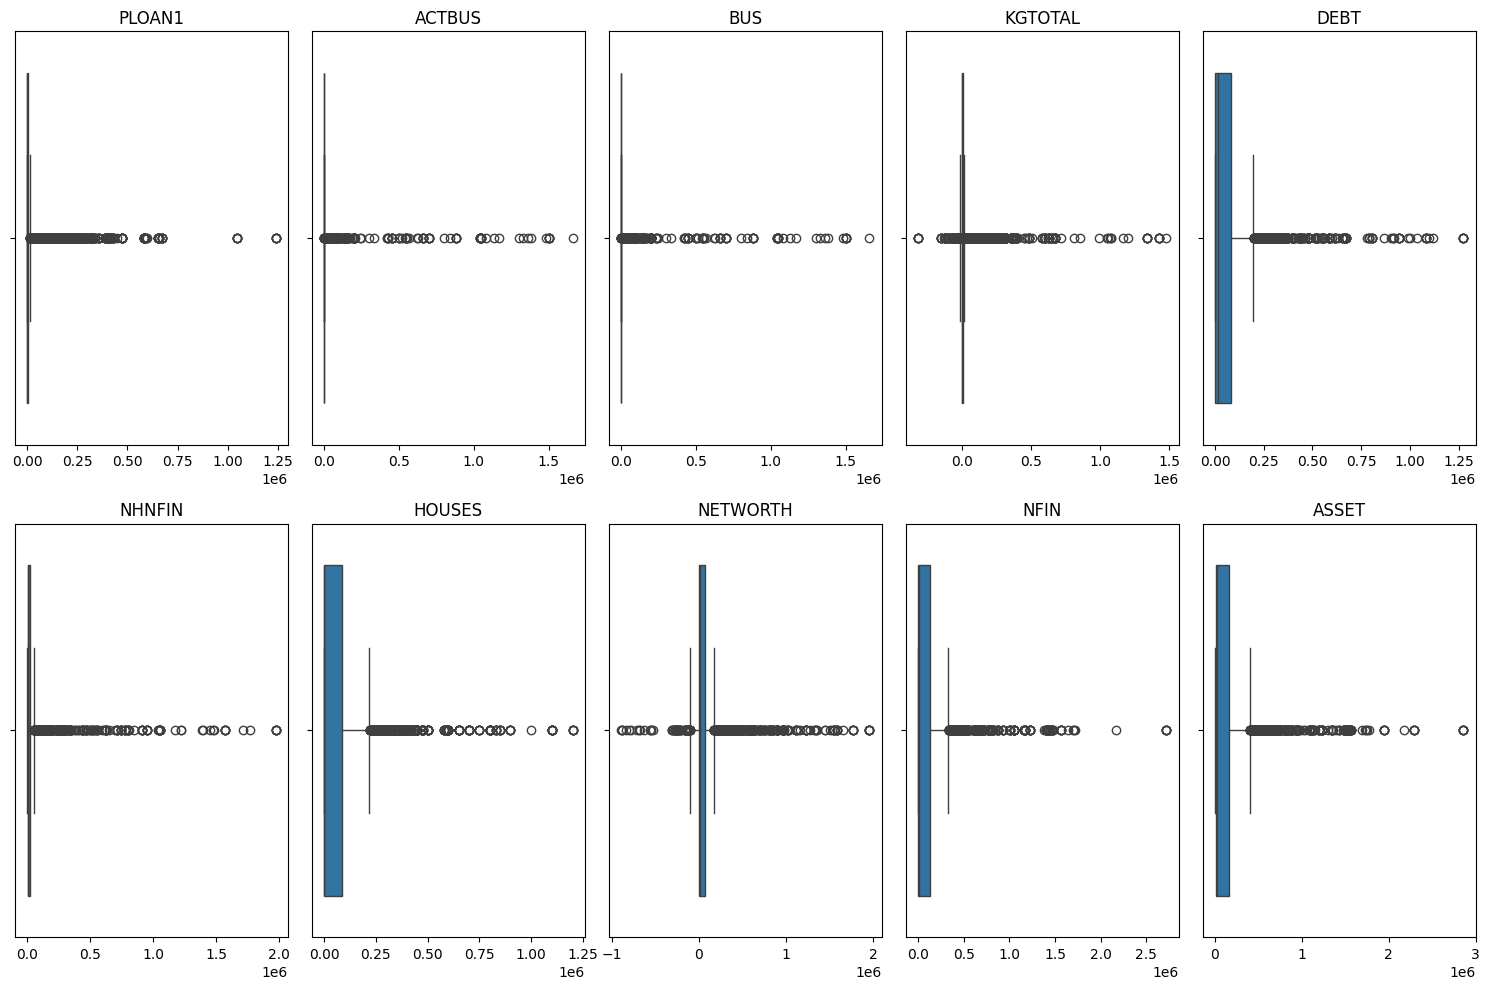

In [ ]:
fig,ax= plt.subplots(2,5,figsize=(15,10))
for i,col in enumerate(feat.index):
  sns.boxplot(data=df,x=col,ax=ax[i//5,i%5])
  ax[i//5,i%5].set_title(col)
  ax[i//5,i%5].set_xlabel("")
  ax[i//5,i%5].set_ylabel("")
plt.tight_layout()
plt.show()



based on the prvious graph i will use diffrent tecnique to get the top 10 features

In [ ]:
#getting top 10 featres with removing .1 of outliers
features =df.apply(trimmed_var).sort_values().tail(10)
#plotting these features
fig =px.bar(
    data_frame=features,
    x=features.values,
    y=features.index,
    orientation="h",
    title="Top ten features with the hieghest variance",
)
fig.show()

## Split

make a new data set with the top 5 features that we will use to the model

In [ ]:
#getting top 5 columns
cols=list(features.tail().index)
#make new data frame
df_new=df[cols]
df_new.head()


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


In [ ]:
#exporting df_new to new csv file
df_new.to_csv("data/data.csv",index=False)